In [80]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = 'c:/data/'
df_train = pd.read_csv(data_path + 'train.csv')
df_train['hour'] = df_train['loctm'].apply(lambda x:(x // 10000)) #時間轉換, 單位時
df_train['mintue'] = df_train['loctm'].apply(lambda x:(x % 10000)//100)  #時間轉換, 單位分
df_train['sec'] = df_train['loctm'].apply(lambda x:(x % 10000)%100)  #時間轉換, 單位秒

In [3]:
drop_item = ['bacno', 'txkey']
change_item = ['ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt']
for i in drop_item:
    df_train = df_train.drop([i], axis=1)
for i in change_item:
    df_train[i] = df_train[i].apply(lambda x:0 if x == 'N' else 1)

In [4]:
df_train.shape

(1521787, 24)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 24 columns):
acqic        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null int64
etymd        1521787 non-null int64
flbmk        1521787 non-null int64
flg_3dsmk    1521787 non-null int64
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null int64
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null int64
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
hour         1521787 non-null float64
mintue       1521787 non-null float64
sec          1521787 non-null float64
dtypes: float

In [19]:
print(df_train['etymd'].value_counts())
print('=' * 30)
print(df_train['contp'].value_counts())
print('=' * 30)
print(df_train['ecfg'].value_counts())
print('=' * 30)
print(df_train['flg_3dsmk'].value_counts())
print('=' * 30)
print(df_train['hcefg'].value_counts())
print('=' * 30)
print(df_train['ovrlt'].value_counts())
print('=' * 30)
print(df_train['flbmk'].value_counts())
print('=' * 30)
print(df_train['mchno'].value_counts())
print('=' * 30)
print(df_train['csmcu'].value_counts())
print('=' * 30)
print(df_train['iterm'].value_counts())
print('=' * 30)
print(df_train['mchno'].value_counts())
print('=' * 30)
print(df_train['stscd'].value_counts())
print('=' * 30)
print(df_train['stocn'].value_counts())

5     404611
2     377669
4     320502
8     243995
0     130022
9      30076
1      10339
3       2350
6       1978
7        228
10        17
Name: etymd, dtype: int64
5    1369806
4      69965
2      66147
6      13593
3       2148
1         84
0         44
Name: contp, dtype: int64
0    1134512
1     387275
Name: ecfg, dtype: int64
0    1444867
1      76920
Name: flg_3dsmk, dtype: int64
5    1412039
0      53925
1      33055
6      12581
8       3820
2       3365
7       1788
9        901
3        313
Name: hcefg, dtype: int64
0    1501536
1      20251
Name: ovrlt, dtype: int64
0    1504133
1      17654
Name: flbmk, dtype: int64
0         49872
54828     38265
54238     36795
59333     32287
86584     20387
82174     19393
78638     19265
59369     17148
44859     16112
544       15575
34217     13593
79200     12243
78537      9114
79111      7180
20434      6907
67459      5703
77989      5312
20437      5269
87177      4988
102979     4919
90135      4896
78073      4459
78098   

In [10]:
correlations = df_train.corr()['fraud_ind'].sort_values()
print('相關係數')
print(correlations)

相關係數
stocn       -0.161405
acqic       -0.083684
hour        -0.042807
loctm       -0.042688
scity       -0.028715
flg_3dsmk   -0.019162
insfg       -0.018403
iterm       -0.014662
mchno       -0.012187
locdt       -0.011773
mcc         -0.002827
sec          0.000046
flbmk        0.002450
mintue       0.002928
cano         0.004608
csmcu        0.013472
conam        0.016634
ovrlt        0.018177
contp        0.023248
hcefg        0.026210
etymd        0.067743
ecfg         0.161701
stscd        0.279225
fraud_ind    1.000000
Name: fraud_ind, dtype: float64


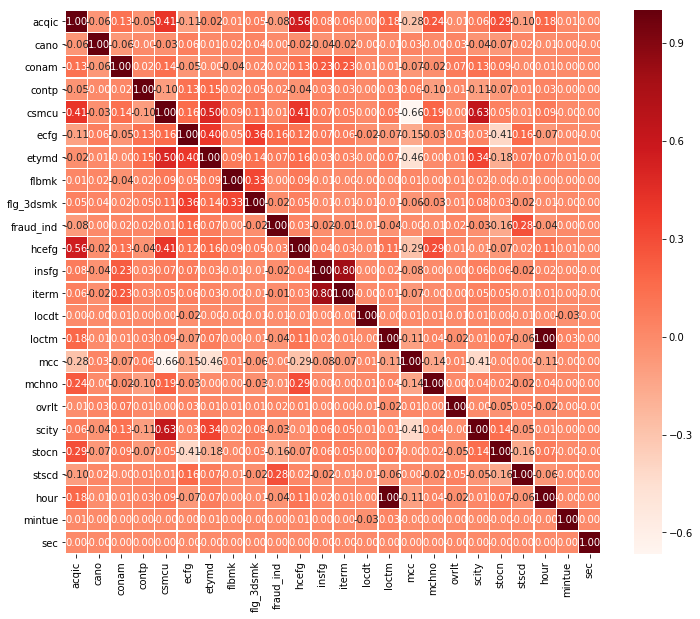

In [11]:
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_train.corr(), annot=True, cmap = "Reds", linewidths=.5, fmt= '.2f',ax = ax)
plt.show()

樣本數：1521787; 正樣本占98.66%; 負樣本占1.34%
正樣本數: 1501432 ; 負樣本數: 20355


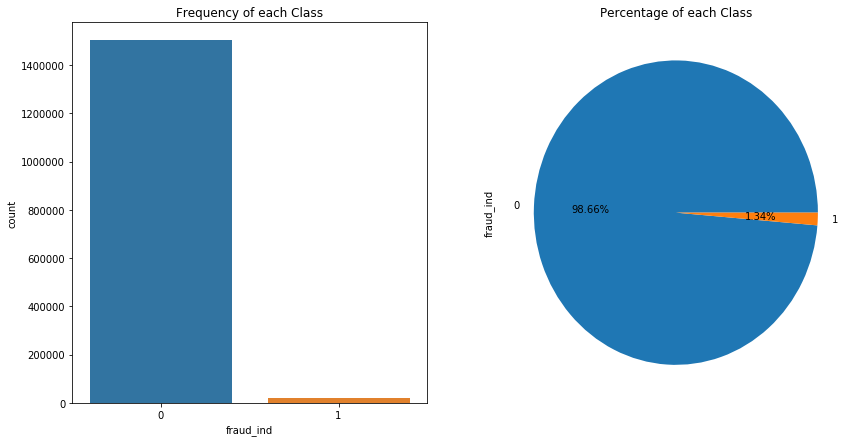

20355

In [32]:
y = df_train['fraud_ind']
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('樣本數：{}; 正樣本占{:.2%}; 負樣本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('正樣本數:',n_pos_sample,';','負樣本數:',n_neg_sample)
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='fraud_ind',data=df_train,ax=axs[0])
axs[0].set_title("Frequency of each Class")
df_train['fraud_ind'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()
df_train[df_train['fraud_ind']== 1].shape[0]

In [13]:
df_train['conam'].describe()#交易金額-台幣

count    1.521787e+06
mean     6.547219e+02
std      4.028078e+02
min      0.000000e+00
25%      4.370600e+02
50%      5.919000e+02
75%      8.073400e+02
max      7.208770e+03
Name: conam, dtype: float64

Text(0.5,0,'conam')

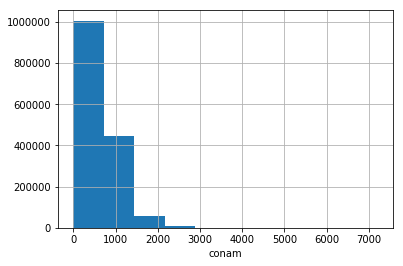

In [10]:
df_train['conam'].hist()
plt.xlabel('conam')

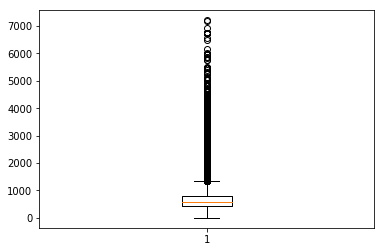

In [11]:
plt.boxplot(df_train['conam']) #交易金額-台幣
plt.show()

C:\Users\Gankinck\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gankinck\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Gankinck\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ga

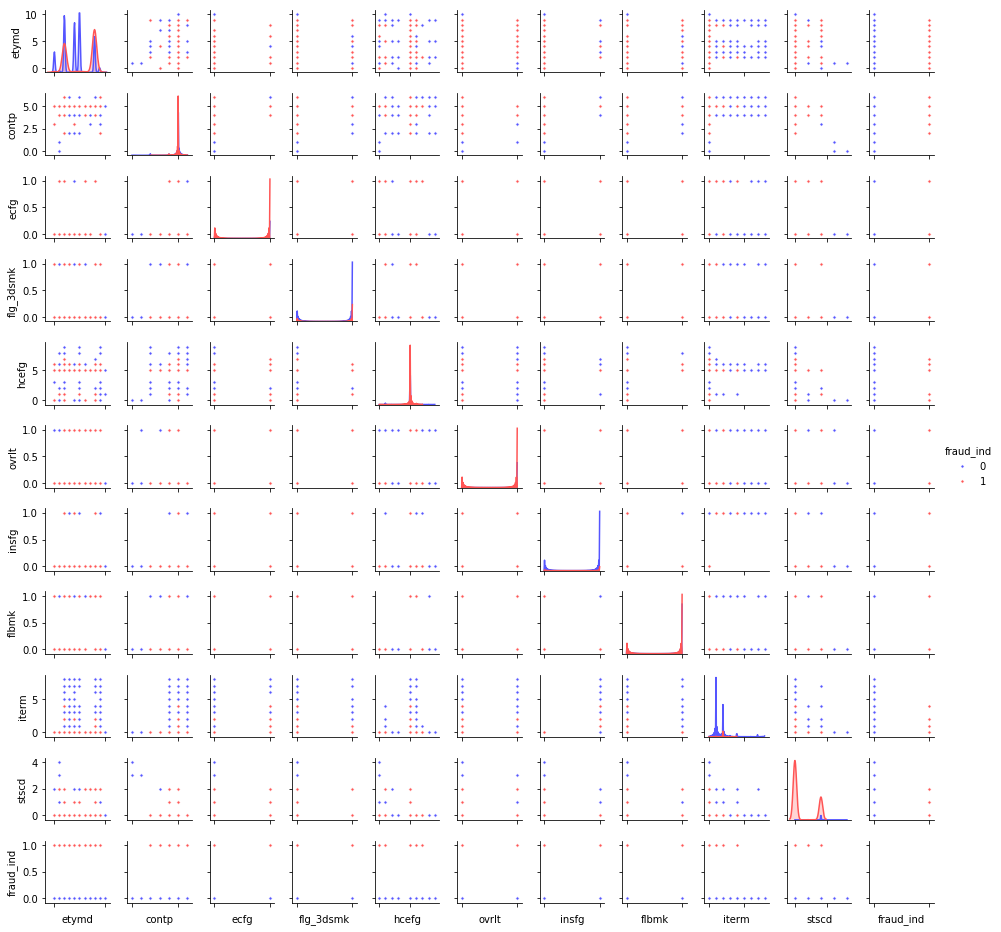

In [24]:
g = sns.pairplot(df_train[[u'etymd', u'contp', u'ecfg', u'flg_3dsmk', u'hcefg', u'ovrlt', u'insfg',u'flbmk',u'iterm',u'stscd',
       u'fraud_ind']], hue='fraud_ind', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

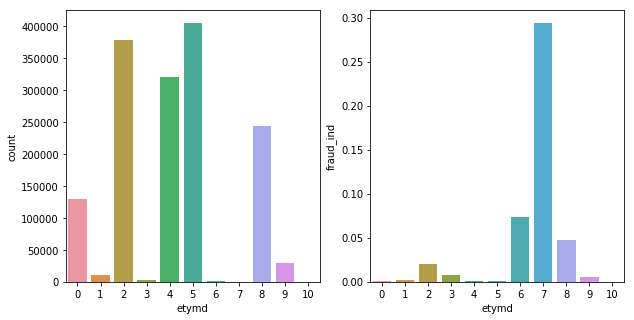

In [13]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x='etymd', data=df_train, ax=axis1)  #交易型態
person_perc = df_train[['etymd', 'fraud_ind']].groupby(['etymd'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='etymd', y= 'fraud_ind', data = person_perc, ax=axis2)

Text(0.5,1,'fraud_ind_mean')

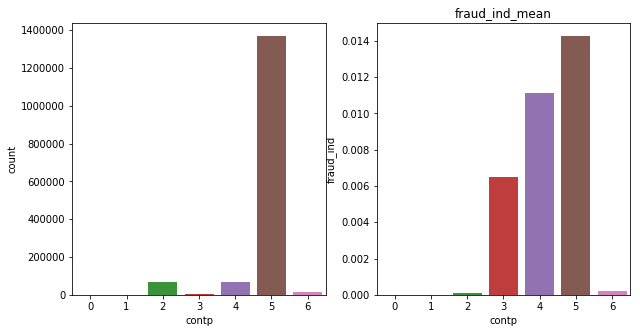

In [14]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x='contp', data=df_train, ax=axis1)  #交易類別
person_perc = df_train[['contp', 'fraud_ind']].groupby(['contp'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='contp', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

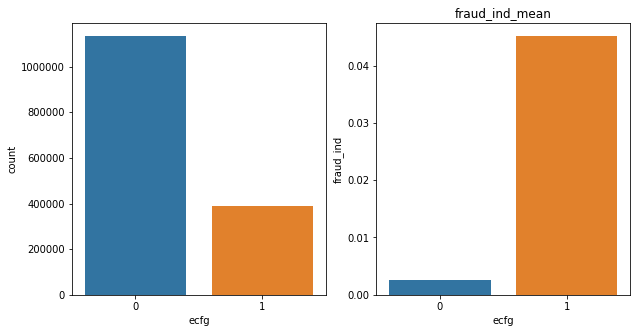

In [15]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="ecfg", data=df_train, ax=axis1) #網路交易註記
person_perc = df_train[['ecfg', 'fraud_ind']].groupby(['ecfg'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='ecfg', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

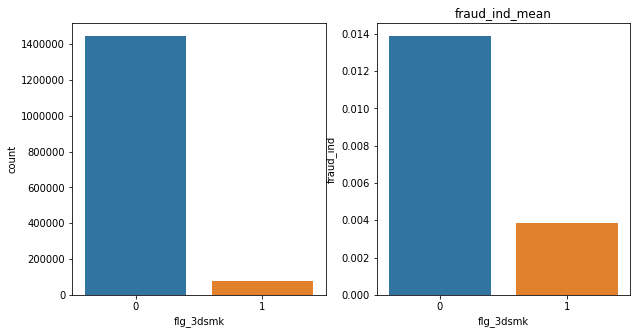

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="flg_3dsmk", data=df_train, ax=axis1) #3DS交易註記
person_perc = df_train[['flg_3dsmk', 'fraud_ind']].groupby(['flg_3dsmk'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='flg_3dsmk', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

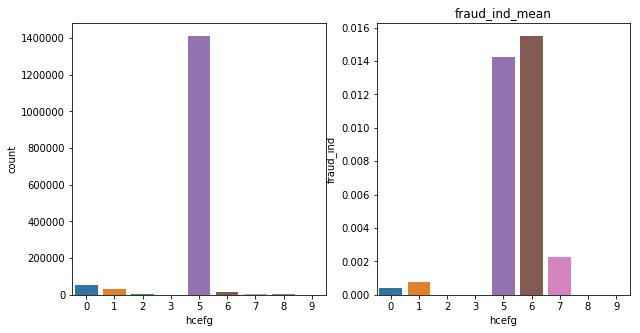

In [17]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="hcefg", data=df_train, ax=axis1) #支付型態
person_perc = df_train[['hcefg', 'fraud_ind']].groupby(['hcefg'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='hcefg', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

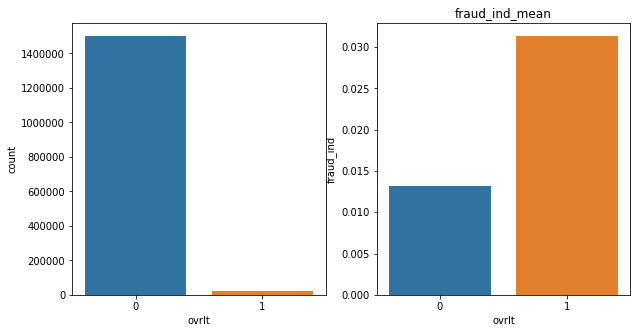

In [18]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="ovrlt", data=df_train, ax=axis1) #超額註記碼
person_perc = df_train[['ovrlt', 'fraud_ind']].groupby(['ovrlt'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='ovrlt', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

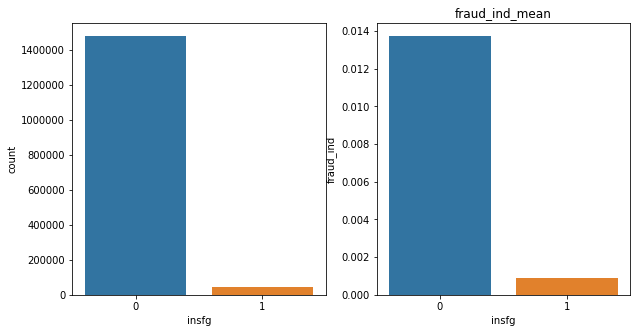

In [19]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="insfg", data=df_train, ax=axis1) #分期交易註記
person_perc = df_train[['insfg', 'fraud_ind']].groupby(['insfg'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='insfg', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

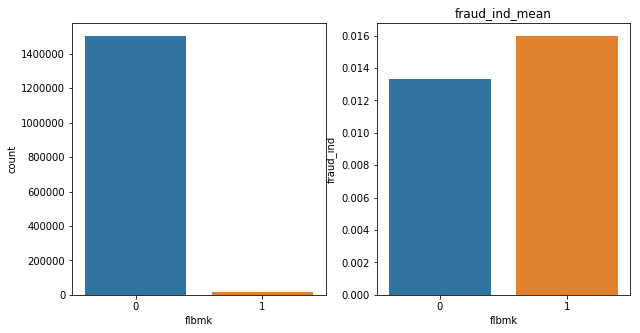

In [26]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="flbmk", data=df_train, ax=axis1) #Fallback 註記
person_perc = df_train[['flbmk', 'fraud_ind']].groupby(['flbmk'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='flbmk', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

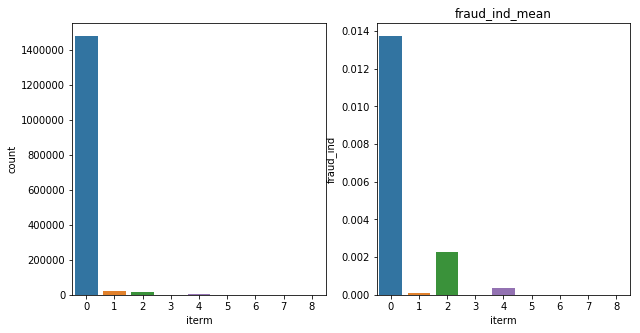

In [37]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="iterm", data=df_train, ax=axis1) #分期期數
person_perc = df_train[['iterm', 'fraud_ind']].groupby(['iterm'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='iterm', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

Text(0.5,1,'fraud_ind_mean')

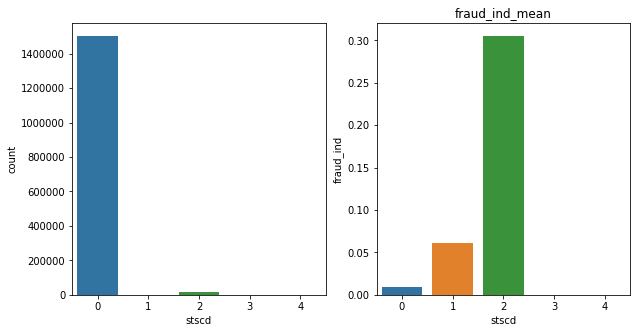

In [33]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))
sns.countplot(x="stscd", data=df_train, ax=axis1) #狀態碼
person_perc = df_train[['stscd', 'fraud_ind']].groupby(['stscd'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='stscd', y= 'fraud_ind', data = person_perc, ax=axis2)
plt.title('fraud_ind_mean')

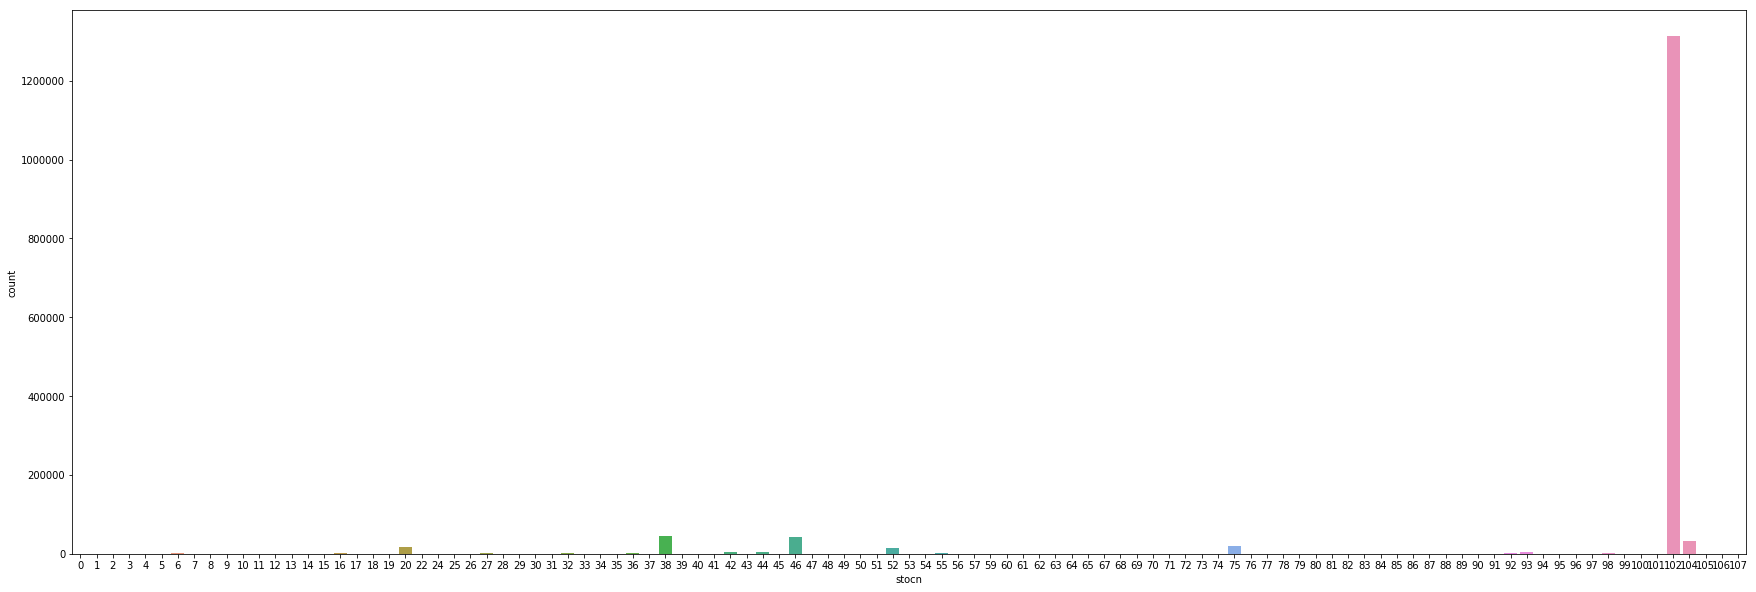

In [63]:
fig = plt.subplots(sharex=True,figsize=(30,10))
sns.countplot(x="stocn", data=df_train) #消費地國別

Text(0.5,1,'fraud_ind_mean')

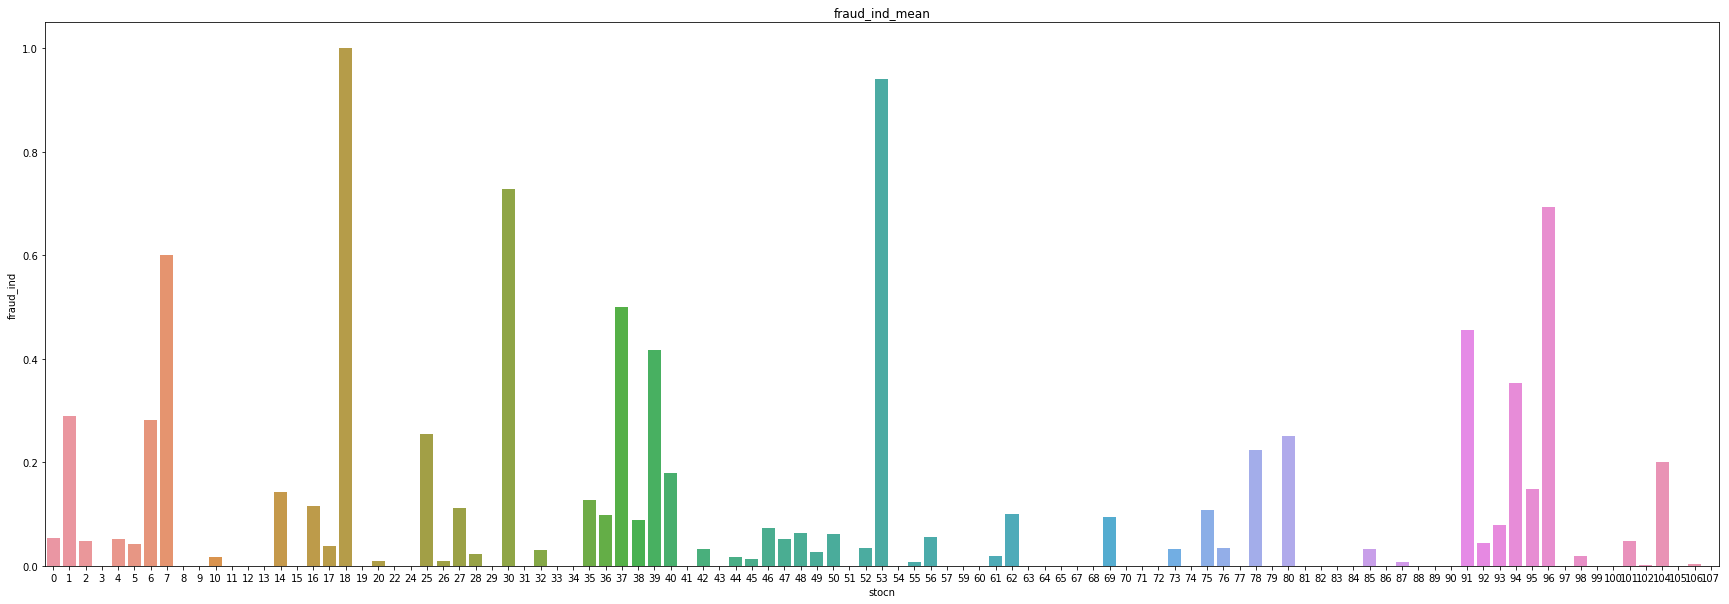

In [70]:
fig = plt.subplots(sharex=True,figsize=(30,10))
person_perc = df_train[['stocn', 'fraud_ind']].groupby(['stocn'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False)
sns.barplot(x='stocn', y= 'fraud_ind', data = person_perc) #消費地國別
plt.title('fraud_ind_mean')

In [88]:
# 盜刷率
print('交易型態',  '   盜刷率')
print(df_train[['etymd', 'fraud_ind']].groupby(['etymd'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('交易類別',  '   盜刷率')
print(df_train[['contp', 'fraud_ind']].groupby(['contp'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('網路交易註記', '盜刷率')
print(df_train[['ecfg', 'fraud_ind']].groupby(['ecfg'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('3DS交易註記', '盜刷率')
print(df_train[['flg_3dsmk', 'fraud_ind']].groupby(['flg_3dsmk'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('支付型態', '盜刷率')
print(df_train[['hcefg', 'fraud_ind']].groupby(['hcefg'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('超額註記碼', '盜刷率')
print(df_train[['ovrlt', 'fraud_ind']].groupby(['ovrlt'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('分期交易註記', '盜刷率')
print(df_train[['insfg', 'fraud_ind']].groupby(['insfg'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('Fallback註記', '  盜刷率')
print(df_train[['flbmk', 'fraud_ind']].groupby(['flbmk'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('分期期數', '   盜刷率')
print(df_train[['iterm', 'fraud_ind']].groupby(['iterm'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))
print('=='*40)
print('狀態碼',  '    盜刷率')
print(df_train[['stscd', 'fraud_ind']].groupby(['stscd'], as_index=False).mean().sort_values(by='fraud_ind', ascending=False))

交易型態    盜刷率
    etymd  fraud_ind
7       7   0.293860
6       6   0.073306
8       8   0.047411
2       2   0.020664
3       3   0.007234
9       9   0.005652
1       1   0.002225
0       0   0.001407
4       4   0.000546
5       5   0.000502
10     10   0.000000
交易類別    盜刷率
   contp  fraud_ind
5      5   0.014274
4      4   0.011106
3      3   0.006518
6      6   0.000221
2      2   0.000121
0      0   0.000000
1      1   0.000000
網路交易註記 盜刷率
   ecfg  fraud_ind
1     1   0.045169
0     0   0.002523
3DS交易註記 盜刷率
   flg_3dsmk  fraud_ind
0          0   0.013884
1          1   0.003835
支付型態 盜刷率
   hcefg  fraud_ind
5      6   0.015500
4      5   0.014241
6      7   0.002237
1      1   0.000787
0      0   0.000389
2      2   0.000000
3      3   0.000000
7      8   0.000000
8      9   0.000000
超額註記碼 盜刷率
   ovrlt  fraud_ind
1      1   0.031356
0      0   0.013133
分期交易註記 盜刷率
   insfg  fraud_ind
0      0   0.013733
1      1   0.000874
Fallback註記   盜刷率
   flbmk  fraud_ind
1      1   0.015974
0    

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


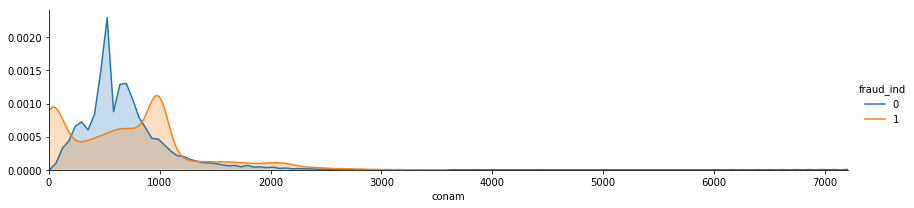

In [22]:
a = sns.FacetGrid(df_train, hue = 'fraud_ind', aspect=4 ) #交易金額-台幣
a.map(sns.kdeplot, 'conam', shade= True )
a.set(xlim=(0 , df_train['conam'].max()))
a.add_legend()

C:\Users\Gankinck\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Gankinck\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


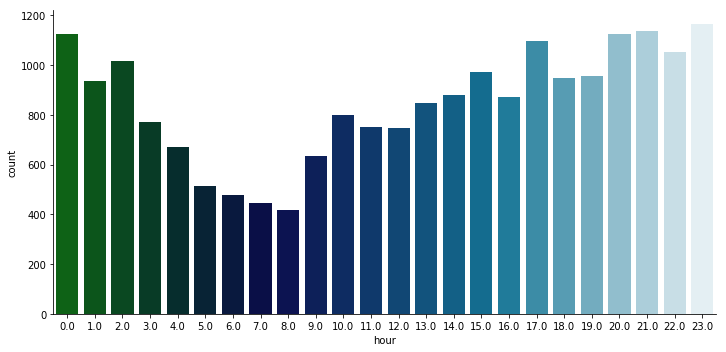

In [16]:
sns.factorplot(x="hour", data = df_train[df_train["fraud_ind"] == 1], kind="count",  palette="ocean", size=5, aspect=2)

C:\Users\Gankinck\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Gankinck\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


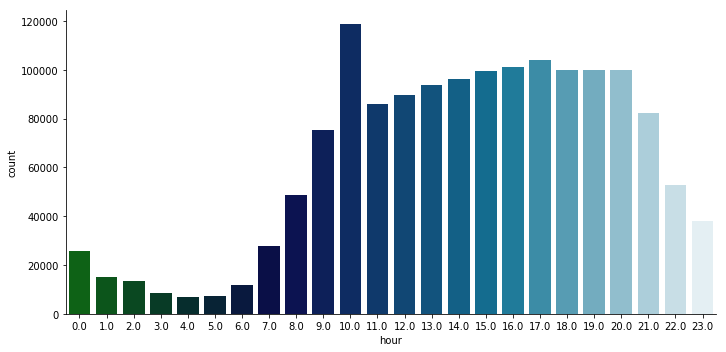

In [18]:
sns.factorplot(x="hour", data=df_train[df_train["fraud_ind"]== 0], kind="count",  palette="ocean", size=5, aspect=2)

Text(0.5,1,'ecfg of etymd')

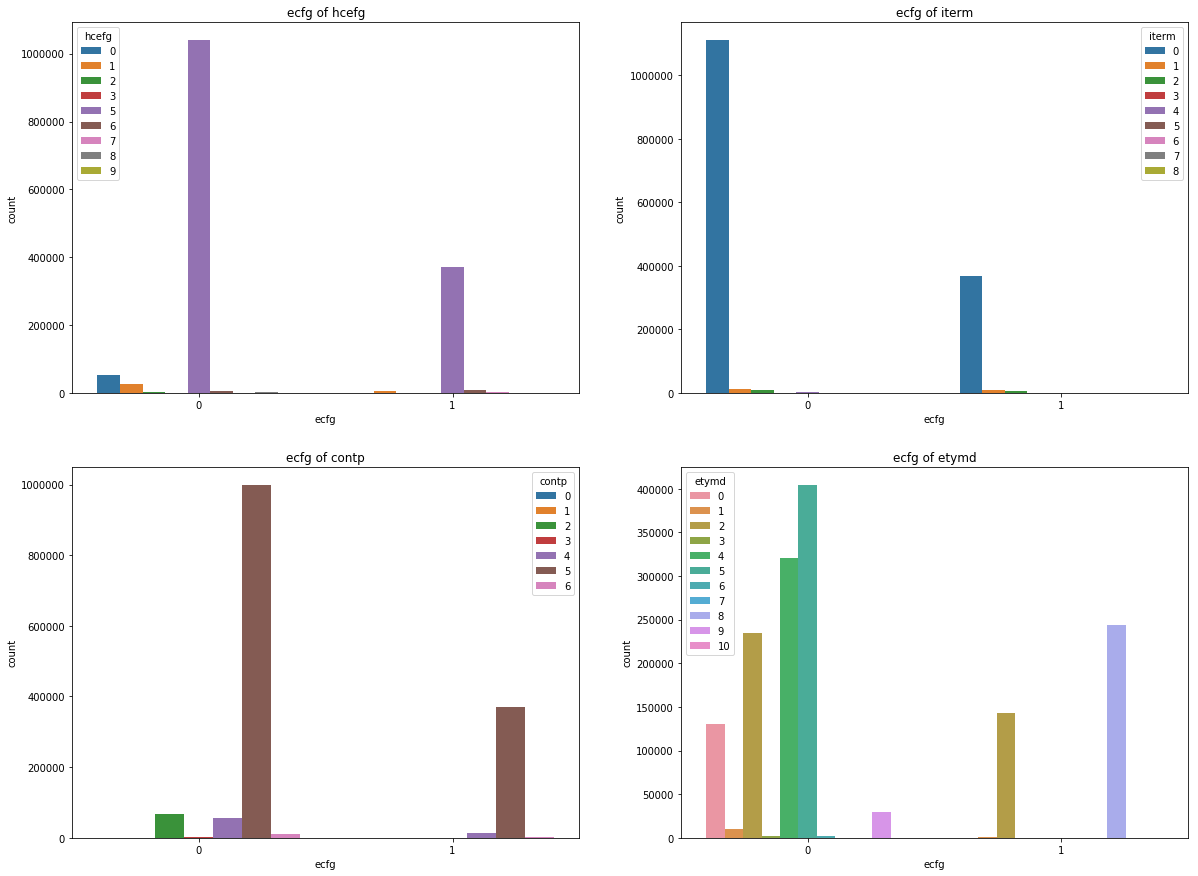

In [50]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('ecfg',hue='hcefg',data=df_train, ax=ax[0,0]) #網路交易註記 與 支付形態
ax[0,0].set_title('ecfg of hcefg')
sns.countplot('ecfg',hue='iterm',data=df_train, ax=ax[0,1]) #網路交易註記 與 分期期數
ax[0,1].set_title('ecfg of iterm')
sns.countplot('ecfg',hue='contp',data=df_train, ax=ax[1,0]) #網路交易註記 與 交易類別
ax[1,0].set_title('ecfg of contp')
sns.countplot('ecfg',hue='etymd',data=df_train, ax=ax[1,1]) #網路交易註記 與 交易型態
ax[1,1].set_title('ecfg of etymd')

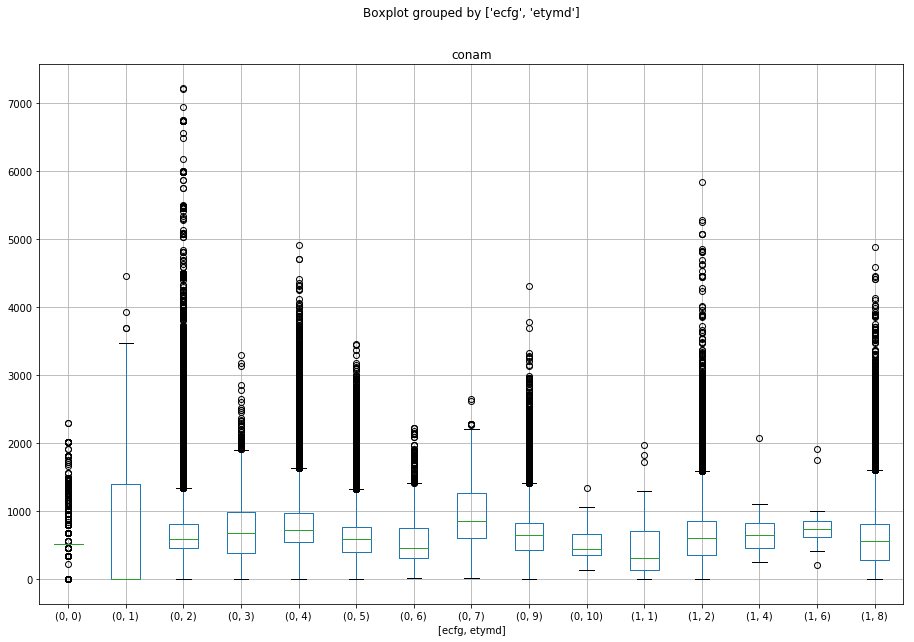

In [56]:
fig,axes = plt.subplots(figsize=(15,10))
df_train.boxplot(column='conam',by=['ecfg','etymd'],ax=axes) #交易金額-台幣 與 網路交易註記 交易型態 

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


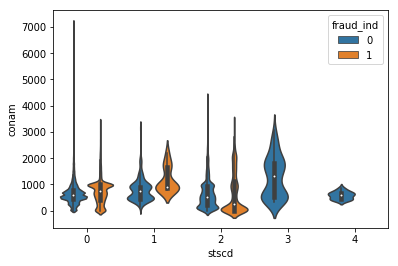

In [85]:
sns.violinplot(x="stscd", y="conam", hue="fraud_ind", data=df_train) #狀態碼

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


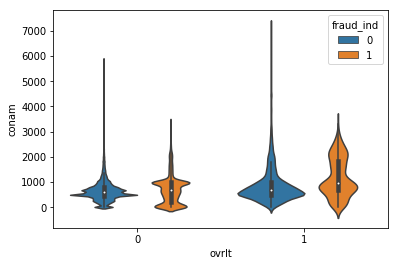

In [84]:
sns.violinplot(x="ovrlt", y="conam", hue="fraud_ind", data=df_train) #超額註記碼

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


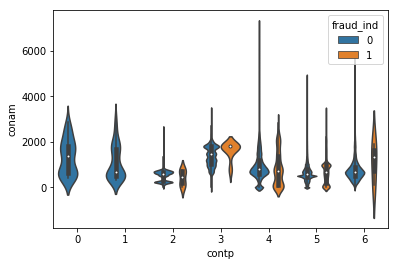

In [86]:
sns.violinplot(x="contp", y="conam", hue="fraud_ind", data=df_train) #交易類別

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


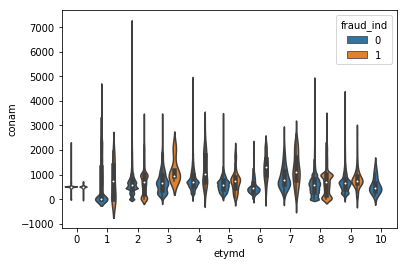

In [87]:
sns.violinplot(x="etymd", y="conam", hue="fraud_ind", data=df_train) #交易型態

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


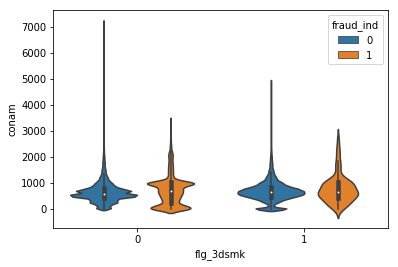

In [89]:
sns.violinplot(x="flg_3dsmk", y="conam", hue="fraud_ind", data=df_train) #3DS 交易註記

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


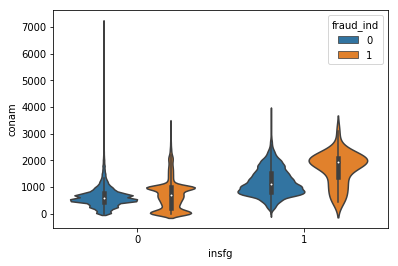

In [90]:
sns.violinplot(x="insfg", y="conam", hue="fraud_ind", data=df_train) #分期交易註記

C:\Users\Gankinck\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


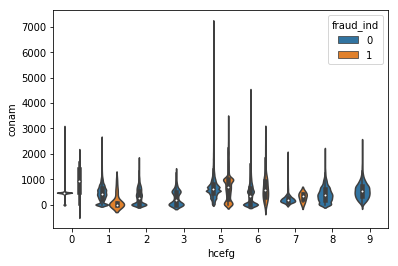

In [91]:
sns.violinplot(x="hcefg", y="conam", hue="fraud_ind", data=df_train) #支付型態